In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import TweetTokenizer
import pickle
import numpy as np
from keras.preprocessing.sequence import pad_sequences


In [3]:
train = pd.read_csv("D:/胡曼婷文件/OneDrive/cours/ESGF 2019/Machine Learning/tweet_sentiment_extraction/train.csv",engine = 'python')

test = pd.read_csv("D:/胡曼婷文件/OneDrive/cours/ESGF 2019/Machine Learning/tweet_sentiment_extraction/test.csv",engine='python')

In [4]:
train.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [5]:
train.shape

(27481, 4)

In [6]:
train["sentiment"].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [7]:
train["sentiment"].value_counts()


neutral     11118
positive     8582
negative     7781
Name: sentiment, dtype: int64

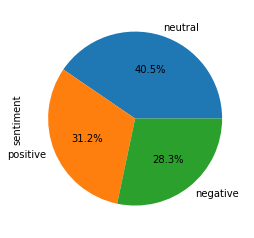

In [8]:
fig, (ax1) = plt.subplots()
pd.value_counts(train['sentiment']).plot(kind = 'pie', ax=ax1,autopct='%1.1f%%')
plt.show()

In [30]:
# défini neutral = 0,negative = 1, positive = 2

df = train 
df["sentiement_index"] = df["sentiment"].map({"neutral":0,"negative":1,"positive":2})
df.head()

,textID,text,selected_text,sentiment,sentiement,sentiement_index
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0,0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,1,1
2,088c60f138,my boss is bullying me...,bullying me,negative,1,1
3,9642c003ef,what interview! leave me alone,leave me alone,negative,1,1
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,1,1


In [34]:
df[df.isnull().any(axis=1)]

,textID,text,selected_text,sentiment,sentiement,sentiement_index
314,fdb77c3752,NaN,NaN,neutral,0,0


In [35]:
# supprimer la ligne nulle 
df = df.drop([314])


In [36]:
df[df.isnull().any(axis=1)]

,textID,text,selected_text,sentiment,sentiement,sentiement_index


In [13]:
#label index
class_index = {k:v for k,v in enumerate(df["sentiment"].unique())}

In [14]:
print(class_index)

{0: 'neutral', 1: 'negative', 2: 'positive'}


In [15]:
df['textID'] = df['textID'].astype(str)
df['text'] = df['text'].astype(str)
df['selected_text'] = df['selected_text'].astype(str)
df['sentiment'] = df['sentiment'].astype(str)

In [16]:
words_set = set()

def get_index(documents,build=True, save=True, index_path= "D:/胡曼婷文件/OneDrive/cours/ESGF 2019/Machine Learning/tweet_sentiment_extraction/index.pickle"):
    
    #mords index
    tknzr = TweetTokenizer()    
    def build_index(row):
        global words_set
        tokens = tknzr.tokenize(row.lower())
        words_set = words_set.union(set(tokens))
        return tokens
    
    if build:
        documents.apply(build_index)
        words_index = {k+1:v for k,v in enumerate(words_set)}
        if save:            
            with open(index_path, 'wb') as out:
                pickle.dump(words_index, out)
    
    else:
         words_index = pickle.load(index_path)
                
    return words_index


In [17]:
def build_sequences (documents, index):
    tknzr = TweetTokenizer()
    sequences = []
    for doc in documents:
        sequences.append([index[w] for w in tknzr.tokenize(doc.lower())])
    return sequences

In [18]:
#embeddings
def read_embeddings(data_path, index, build=True, save=True):
    embeddings = np.zeros((len(index) + 1, 25))
    reverse_index = {v: k for k, v in index.items()}
    if build:
        with open(data_path, "r", encoding="utf-8") as file:
            for line in file:
                tokens = line.split(" ")
                w = tokens[0]
                zw = tokens[1:]
                try:
                    embeddings[reverse_index[w]] = np.array([float(zj) for zj in zw])
                except KeyError :
                    continue
        if save:
            with open (data_path, 'wb') as out:
                pickle.dump(embeddings, out)
    else:
        with open(data_path,'rb') as out:
            embeddings = pickle.load(out)
    return embeddings

In [19]:
words_index = get_index(df['text'], build=True, save=True)

In [20]:
print(words_index)

{1: 'fabulous', 2: 'maxi', 3: 'toadtastic', 4: 'copyright', 5: 'knackered', 6: 'camping', 7: 'demad', 8: 'jiuliani', 9: 'rblpnqte', 10: 'selfishness', 11: 'timid', 12: 'kingston', 13: '2-3', 14: 'arrggh', 15: 'hoarse', 16: 'hen', 17: 'tipped', 18: 'cubs', 19: 'manicurist', 20: 'glassers', 21: 'cx', 22: 'chino', 23: 'drasda', 24: '930a', 25: 'rats', 26: 'yvonne', 27: 'sue', 28: 'names', 29: '#starwars', 30: 'scriptgirl', 31: 'g2g', 32: 'forces', 33: 'trojan', 34: 'speedbumps', 35: 'yukky', 36: 'prototype', 37: 'pistons', 38: 'lei', 39: 'aswered', 40: 'traitor', 41: '365', 42: 'dealin', 43: 'clarks', 44: 'morgen', 45: '3:30', 46: '_tall_blonde', 47: 'luna', 48: 'kirkland', 49: 'croatian', 50: 'nomatter', 51: 'squeeky', 52: 'dreary', 53: '_angel84', 54: 'airbrushed', 55: 'chavs', 56: 'ochoa', 57: 'http://twibes.com/group/pict', 58: 'furby', 59: 'wefollow', 60: 'pies', 61: 'ta', 62: 'gahan', 63: 'grets', 64: '@_everblue', 65: 'rankings', 66: 'pku', 67: 'eeehhh', 68: 'inconvenience', 69: 'l

In [21]:
reverse_word_index = {v:k for k, v in words_index.items()}

In [22]:
sequences = build_sequences(df['text'], reverse_word_index)

In [64]:
max_lenght= max([len(s.split()) for s in df['text']])

In [65]:
x = pad_sequences(sequences, maxlen=max_lenght, padding="post")

In [66]:
print(x.shape)

(27480, 33)


In [37]:
y = df['sentiement_index']

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2)

In [48]:
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils import to_categorical

In [68]:
max_features = len(words_index)+1

batch_size = 1000
epochs = 10
num_classes = 3

In [69]:
model_LSTM=Sequential()
model_LSTM.add(Embedding(max_features,100,input_length=max_lenght))
model_LSTM.add(LSTM(64,dropout=0.2,return_sequences=True))
model_LSTM.add(LSTM(32,dropout=0.3,return_sequences=False))
model_LSTM.add(Dense(num_classes,activation='softmax'))

In [70]:
print(model_LSTM.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 33, 100)           2749200   
_________________________________________________________________
lstm_5 (LSTM)                (None, 33, 64)            42240     
_________________________________________________________________
lstm_6 (LSTM)                (None, 32)                12416     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 99        
Total params: 2,803,955
Trainable params: 2,803,955
Non-trainable params: 0
_________________________________________________________________
None


In [71]:
model_LSTM.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_LSTM.fit(X_train, y_train,batch_size=batch_size, epochs=epochs,  verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
21984/21984 [==============================] - 13s 612us/step - loss: 1.0870 - accuracy: 0.3981
Epoch 2/10
21984/21984 [==============================] - 12s 552us/step - loss: 1.0426 - accuracy: 0.4411
Epoch 3/10
21984/21984 [==============================] - 12s 544us/step - loss: 0.8161 - accuracy: 0.6267
Epoch 4/10
21984/21984 [==============================] - 12s 538us/step - loss: 0.6037 - accuracy: 0.7608
Epoch 5/10
21984/21984 [==============================] - 12s 550us/step - loss: 0.4817 - accuracy: 0.8231
Epoch 6/10
21984/21984 [==============================] - 13s 575us/step - loss: 0.3960 - accuracy: 0.8643
Epoch 7/10
21984/21984 [==============================] - 13s 597us/step - loss: 0.3276 - accuracy: 0.8918
Epoch 8/10
21984/21984 [==============================] - 12s 535us/step - loss: 0.2874 - accuracy: 0.9073
Epoch 9/10
21984/21984 [==============================] - 13s 582us/step - loss: 0.2551 - accura

In [74]:
y_pred_test = model_LSTM.predict_classes(X_test)

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

[[1432  429  363]
 [ 429 1039   88]
 [ 381  111 1224]]
0.6723071324599709
